In [2]:
import pandas as pd

# Load the dataset
file_path = "owid-covid-data.csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()


Dataset loaded successfully.


In [3]:
from sklearn.datasets import load_iris

In [4]:
print("\nFirst five rows of the dataset:")
print(df.head())


First five rows of the dataset:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousa

In [5]:
print("\nDataset Info:")
print(df.info())

print("\nCheck for Missing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245306 entries, 0 to 245305
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    245306 non-null  object 
 1   continent                                   231515 non-null  object 
 2   location                                    245306 non-null  object 
 3   date                                        245306 non-null  object 
 4   total_cases                                 231243 non-null  float64
 5   new_cases                                   230857 non-null  float64
 6   new_cases_smoothed                          229658 non-null  float64
 7   total_deaths                                211794 non-null  float64
 8   new_deaths                                  211673 non-null  float64
 9   new_deaths_smoothed                         210487 non-

In [6]:
# Handle missing values (e.g., fill with mean or drop rows/columns with excessive nulls)
missing_threshold = 0.3  # Drop columns with more than 30% missing values
df = df.dropna(thresh=len(df) * (1 - missing_threshold), axis=1)

print("\nColumns after removing those with excessive missing values:")
print(df.columns)

# Fill remaining missing values with appropriate defaults (e.g., mean)
df.fillna(df.mean(numeric_only=True), inplace=True)
print("\nMissing values filled with column means.")


Columns after removing those with excessive missing values:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'stringency_index', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'population'],
      dtype='object')

Missing values filled with column means.


In [7]:
# Task 2: Basic Data Analysis

In [8]:
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  2.453060e+05  2.453060e+05        2.453060e+05  2.453060e+05   
mean   4.903610e+06  1.214487e+04        1.217660e+04  7.721905e+04   
std    2.951400e+07  8.110213e+04        7.895228e+04  3.670527e+05   
min    1.000000e+00  0.000000e+00        0.000000e+00  1.000000e+00   
25%    5.955000e+03  0.000000e+00        6.714000e+00  1.600000e+02   
50%    7.395250e+04  6.800000e+01        1.221430e+02  2.540000e+03   
75%    9.332545e+05  1.530000e+03        1.843250e+03  3.767575e+04   
max    6.571163e+08  4.083950e+06        3.439392e+06  6.678756e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  245306.000000        245306.000000            245306.000000   
mean      131.118664           131.712799             67423.155964   
std       656.744738           641.628755            112839.308424   
min         0.000000             0.000000                 0.0

In [9]:
# Groupings
grouped = df.groupby('location')['new_cases'].mean()
print("\nAverage new cases per location:")
print(grouped)


Average new cases per location:
location
Afghanistan          223.645512
Africa             11891.166189
Albania              475.007126
Algeria              262.027053
Andorra               46.342080
                      ...      
Western Sahara     12144.874992
World             613202.511693
Yemen                 24.334217
Zambia               353.712488
Zimbabwe             329.234669
Name: new_cases, Length: 248, dtype: float64


In [10]:
# Task 3: Data Visualization

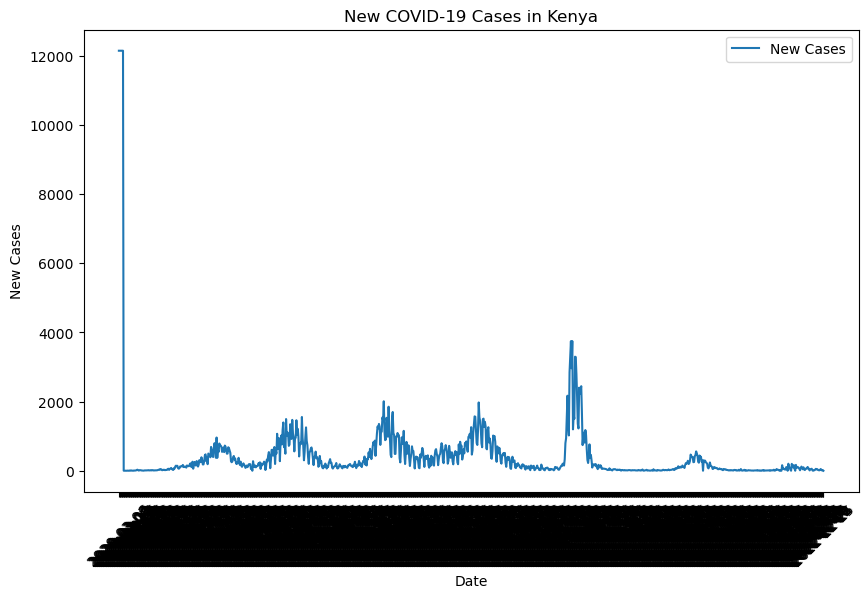

In [ ]:
# Line Chart: Trends Over Time (e.g., Daily New Cases for a Country):
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for a specific country (e.g., 'Kenya')
country_data = df[df['location'] == 'Kenya']

plt.figure(figsize=(10, 6))
plt.plot(country_data['date'], country_data['new_cases'], label='New Cases')
plt.title('New COVID-19 Cases in Kenya')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.legend()
plt.show()

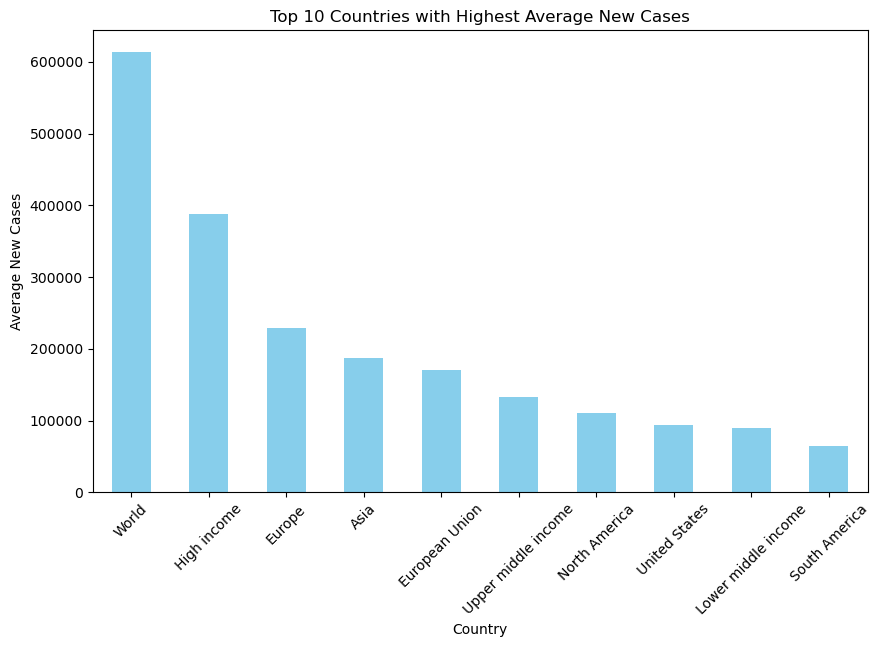

In [13]:
# Bar Chart: Comparison of Average New Cases Across Countries:
top_countries = grouped.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Average New Cases')
plt.xlabel('Country')
plt.ylabel('Average New Cases')
plt.xticks(rotation=45)
plt.show()

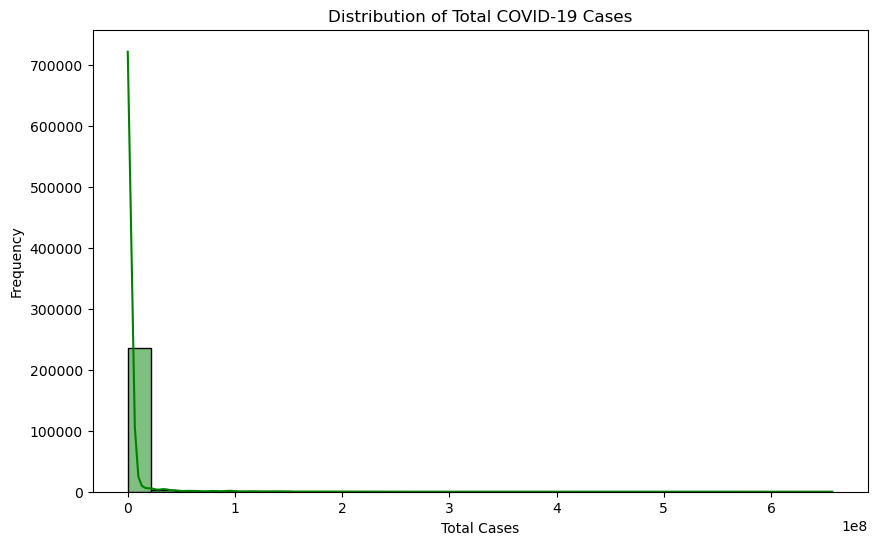

In [14]:
# Histogram: Distribution of Total Cases:
plt.figure(figsize=(10, 6))
sns.histplot(df['total_cases'], kde=True, bins=30, color='green')
plt.title('Distribution of Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')
plt.show()

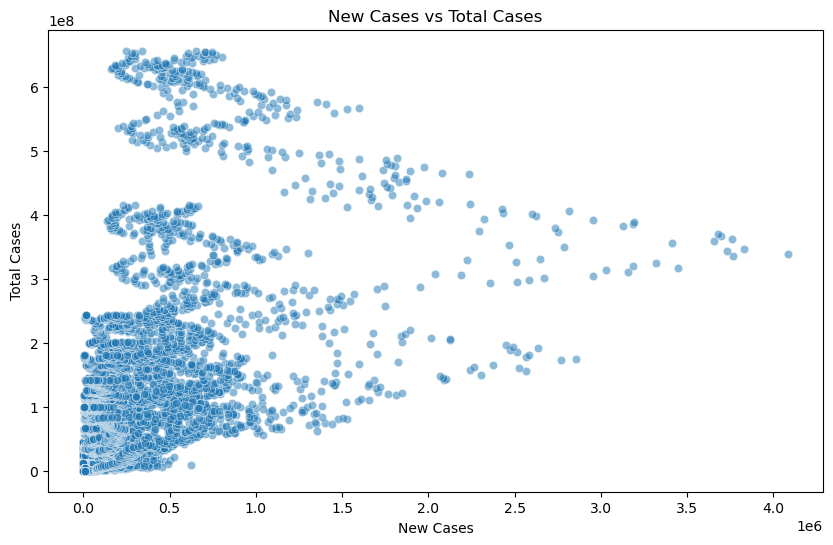

In [15]:
# Scatter Plot: Relationship Between New Cases and Total Cases:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='new_cases', y='total_cases', data=df, alpha=0.5)
plt.title('New Cases vs Total Cases')
plt.xlabel('New Cases')
plt.ylabel('Total Cases')
plt.show()